# 데이터분석 순서

### KDD 분석 방법론
1. 데이터셋 선택 : CSV, EXCEL, DB에서 데이터를 읽어옴
2. 데이터 전처리 : 데이터타입, 결측치처리, 이상치탐지, 데이터분포분석, 상관관계
3. 데이터 변환(특성추출) : 원본 데이터에서 새로운 데이터 생성, 삭제, 스케일링, 구간화 등
4. 데이터 마이닝(모델 만들기, 분석) : 분석에 적합한 알고리즘 선택, 모델 생성/튜닝
5. 결과 평가(인사이트 도출) : 테스트 데이터를 이용해 데이터 마이닝으로 만든 모델의 성능 평가 


# 데이터 전처리
- 데이터 타입 변환
- 결측치 탐지 및 보간
- 이상치 탐지 및 처리
- 데이터 특성 파악(치우침, 분포 특성)
- 변수들 간의 상관관계 분석

In [1]:
import pandas as pd
import numpy as np

# 1. 데이터셋 선택 및 로딩
- 데이터 로드 후 head(), tail()로 컬럼 및 데이터 파악

In [2]:
data = pd.read_csv('./data/Taitanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. .info()로 컬럼명, 결측치, 데이터 타입 파악

In [3]:
# 데이터가 너무 커서 Non-Null이 표시되지 않는 경우 : show_counts=True
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. describe()로 기초통계량 파악(이상치 파악)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 결측값 찾고, 비율 보고, 대치 / 삭제 수행
- isna().sum() : 컬럼별 결측치를 확인 가능
- isna().sum() / len(데이터프레임명) * 100 : 컬럼별 결측치가 차지하는 비율 확인
    
## 결측값 처리
- 결측값 비율이 5% 미만 : 행, 열 제거하여 사용(분석에 큰 영향을 미치지 않음)
- 결측값 비율이 5%~30% : 결측값을 대체(Imputation)
    - 수치형 데이터(숫자형, 나이, 가격 등) : 평균, 중앙값, 최빈값(mode)으로 대체 가능
    - 범주형 데이터(문자형/숫자형, 선실등급, 탑승지 등) : 최빈값(mode)로 대체 가능
-  결측값 비율이 30%~50% : 컬럼의 중요도에 따라서 결측값을 대체 혹은 삭제
- KNN(K-Nearst Heighbor, 최근접이웃) imputer, 회귀분석을 통한 결측값 대체
- 결측값 50% 이상 : 해당 컬럼 삭제
   

In [5]:
# Embarked : 5% 미만이므로 결측치 대체나 행을 제거
# Age : 결측치 대체
# Cabin : 해당 컬럼 삭제

round(data.isna().sum() / len(data) * 100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## 결측 데이터의 종류
- MCAR(완전 무작위 결측) : 다른 변수와 무관하게 생긴 결측(랜덤, 이유 없음)
    - 설문 조사 중 일부 응답자가 무작위로 답변 건너뜀
- MAR(무작위 결측) : 다른 변수와는 관련 있지만 본인과는 무관
    - 나이 많은 사람들이 소득란에 응답하지 않은 경우(나이와 관련)
    - 직업에 따라 학력란에 응답하지 않는 경우(가정환경, 소득)
- NMAR(비무작위 결측) : 변수 자기 자신과 직접 관련이 있는 경우
    - 소득이 낮은 사람이 자신의 소득을 숨기는 경우(소득과 결측이 직접 관련)
    - 체중이 많이 나가는 경우 자신의 체중을 숨기는 경우
    - 만족도가 낮은 고객이 만족도 조사에 응하지 않는 경우

## 결측치 처리방법
- 1) 단순대치법(simple imputation)
    - (1) 완전 분석 : 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석(잘 안씀)
        - 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우
        - 결측값을 삭제한 후에 데이터에 편향이 없다는 전제가 있을 때
        - dropna() : 결측값이 있는 모든 행 삭제
    - (2) 평균 대치법 : 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
        - 평균을 이용하기 때문에 간편
        - 데이터에 이상치가 없는 경우 평균값 대체 가능
        - 데이터에 이상치가 있는 경우 중앙값이나 최빈값 고려

### (1) 완전 분석 

In [7]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
183 / len(data) * 100

20.53872053872054

### (2) 평균 대치법

In [9]:
a = pd.Series([24, 5, 10, 34, 20, 18, 28, 23]) # 이상치가 없는 경우
b = pd.Series([24, 5, 10, 34, 20, 18, 28, 2000]) # 이상치가 있는 경우

In [10]:
print('a의 평균값 = ',a.mean())
print('b의 평균값 = ',b.mean())

a의 평균값 =  20.25
b의 평균값 =  267.375


{'whiskers': [<matplotlib.lines.Line2D at 0x27ccace8280>,
 'caps': [<matplotlib.lines.Line2D at 0x27ccace8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ccaccef40>],
 'medians': [<matplotlib.lines.Line2D at 0x27ccace8ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ccace8f40>],
 'means': []}

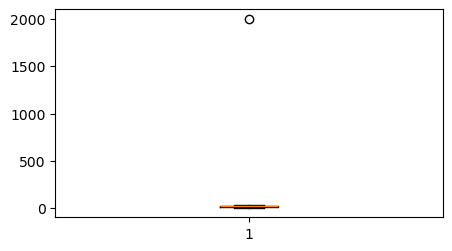

In [11]:
import matplotlib.pyplot as plt

# 이상치가 존재하는지 확인하기 위해 박스수염 그래프로 확인
# 너무 크거나 작은 이상치는 평균에 영향을 줌
plt.subplots(figsize = (5, 2.7))
plt.boxplot(b)

In [12]:
# pandas에서만 median이 되나보다
print('a의 중앙값 = ', np.median(a))
print('b의 중앙값 = ', np.median(b))

a의 중앙값 =  21.5
b의 중앙값 =  22.0


In [13]:
sorted(b)

[5, 10, 18, 20, 24, 28, 34, 2000]

In [14]:
sorted(a)

[5, 10, 18, 20, 23, 24, 28, 34]

#### Age 컬럼의 결측값을 평균 대치법으로 대치

In [32]:
data['Age'].isna().sum()

np.int64(177)

In [33]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
age_na_idx = data[data['Age'].isna()].index

In [35]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [36]:
data.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


#### 중앙값으로 대치

In [37]:
# 깊은 복사, 얕은 복사
data = pd.read_csv('./data/Taitanic_train.csv')
data2 = data.copy()

In [38]:
age_na_index2 = data2[data2['Age'].isna()].index

In [39]:
data2['Age'].median()

np.float64(28.0)

In [40]:
data2['Age'] = data2['Age'].fillna(data2['Age'].median())

In [42]:
data2.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


### 최빈값으로 대치 .mode()

In [43]:
data = pd.read_csv('./data/Taitanic_train.csv')
data3 = data.copy()

In [44]:
print(type(data3['Age'].mode()[0]))

<class 'numpy.float64'>


In [45]:
age_na_idx3 = data3[data3['Age'].isna()].index

In [46]:
# 시리즈 형태로 나오기 때문에 최빈값을 .iloc[0] / [0]으로 추출
data3['Age'] = data3['Age'].fillna(data3['Age'].mode()[0])

In [47]:
data3.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


# Scikit-learn
- https://scikit-learn.org/stable/user_guide.html

## scikit-learn의 simple imputer를 이용한 대치

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
import pandas as pd
data = pd.read_csv('./data/Taitanic_train.csv')
data4 = data.copy()

#### sklearn : 평균값 대치

In [50]:
na_idx = data4[data4['Age'].isna()].index

In [51]:
imp_mean = SimpleImputer(strategy = 'mean')
data4['Age'] = imp_mean.fit_transform(data4[['Age']])[:, 0]

In [52]:
data4['Age'].isna().sum()

np.int64(0)

In [53]:
data4.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


#### sklearn : 중앙값 대치

In [9]:
data3 = data.copy()

In [15]:
imp_median = SimpleImputer(strategy = 'median')
data3['Age'] = imp_median.fit_transform(data3[['Age']])[:, 0]

In [26]:
data3['Age'].isna().sum()

np.int64(0)

In [27]:
data3.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


#### sklearn : 최빈값 대치

In [54]:
data5 = data.copy()

In [55]:
# 최빈값 대체 전략 선택
imp_mode = SimpleImputer(strategy = 'most_frequent')

# Age 컬럼은 Series이기 때문에 fit_transform 사용 위해 데이터프레임(2차원)으로 변환
# 2차원에서 1차원으로 차원 변환 : 첫번째 열만 꺼내서 대체 진행(1차원으로 바꿔서 데이터 삽입)
data5['Age'] = imp_mode.fit_transform(data5[['Age']])[:, 0]

In [56]:
data5['Age'].isna().sum()

np.int64(0)

In [57]:
data5.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


## KNN 최근접이웃법
- 결측값 비율이 30%~50%인 경우 사용

In [59]:
from sklearn.impute import KNNImputer

In [60]:
data6 = data.copy()

In [61]:
knn_imp = KNNImputer(n_neighbors=5)
data6['Age'] = knn_imp.fit_transform(data6[['Age']])[:, 0]

In [62]:
data6['Age'].isna().sum()

np.int64(0)

In [63]:
# mean과 동일한 결과가 나오는 게 맞음 = 평균으로 대치하는 것이 맞다는 방증
data6.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


## 깊은 복사, 얕은 복사

In [64]:
# data를 copy()를 이용해 복사
data_copyed = data.copy()

# data를 다른 변수에 재할당
data_reassigned = data

In [65]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
data7 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [67]:
print(id(data))
print(id(data7))

2735056736608
2734973926224


In [68]:
data['Age'].isna().sum()

np.int64(177)

In [69]:
data_reassigned['Age'] = data_reassigned['Age'].fillna(28)

In [70]:
data_reassigned['Age'].isna().sum()

np.int64(0)

In [71]:
data['Age'].isna().sum()

np.int64(0)

In [72]:
data.loc[na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


## 실제 메모리 상의 주소를 출력 : id()

In [75]:
print('data의 메모리 주소', id(data))
print('data의 메모리 주소', id(data_reassigned))
print('data의 메모리 주소', id(data_copyed))

data의 메모리 주소 2735056736608
data의 메모리 주소 2735056736608
data의 메모리 주소 2735057403616


In [76]:
new_df = data_copyed[['Survived', 'Pclass', 'Name']]
print('data_copyed: ', id(data_copyed))
print('new_df: ', id(new_df))

data_copyed:  2735057403616
new_df:  2734974010464


In [77]:
loc_result = data_copyed.loc[data_copyed['Age']>50, ['Name', 'Age']]
slice_result = data_copyed[data_copyed['Age'] > 50][['Name', 'Age']]

In [78]:
print(id(loc_result))
print(id(slice_result))

2734974186736
2734973924976


In [79]:
print("data_copyed:", id(data_copyed))
print("loc_result:", id(loc_result))
print("slice_result:", id(slice_result))

data_copyed: 2735057403616
loc_result: 2734974186736
slice_result: 2734973924976


In [80]:
data.isna().sum() / len(data * 100)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [81]:
# 전체의 77%의 결측치 값을 가지므로 해당 컬럼 제거
data.drop("Cabin", axis=1, inplace=True)

# 카테고리 변수의 경우 최빈값 .mode()를 이용해 결측값 처리

In [82]:
cabin_idx = data[data['Embarked'].isna()].index

In [83]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [84]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [86]:
data7 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [87]:
print(id(data))
print(id(data7))

2735056736608
2734973924496
